<a href="https://colab.research.google.com/github/ChaseMcClellan/CS422Labs/blob/main/BinaryLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Dataset Preperation**

Install

In [46]:
pip install ucimlrepo


In [47]:
pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


Import and display

In [70]:

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

Pre processing

In [71]:
import pandas as pd

#missing values check
missing_values = X.isnull().sum()
print("Missing values per feature:\n", missing_values)

#Drop rows
X_cleaned = X.dropna()

y_cleaned = y.loc[X_cleaned.index]

#Display
print(f"Shape before cleaning: {X.shape}")
print(f"Shape after cleaning: {X_cleaned.shape}")


Missing values per feature:
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64
Shape before cleaning: (48842, 14)
Shape after cleaning: (47621, 14)


**2. Feature Engineering**

In [72]:
#Drop irrelevant stuff
X_selected = X_cleaned.drop(columns=["fnlwgt"])

#Display
print(X_selected.head())

#update target
y_selected = y_cleaned

   age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country  
0             0              40  United-States  
1             0              13  United-States  

In [83]:
# Drop rows with missing target (Uses code from Chat-GPT 4o)
y_selected = y_selected.dropna()

#align
X_selected = X_selected.loc[y_selected.index]

#check
print(f"After fixing - X_selected shape: {X_selected.shape}")
print(f"After fixing - y_selected shape: {y_selected.shape}")
print(f"Missing values in y_selected: {y_selected.isnull().sum()}")


After fixing - X_selected shape: (32561, 13)
After fixing - y_selected shape: (32561,)
Missing values in y_selected: 0


target encoding

In [84]:
from category_encoders import TargetEncoder#(Uses code from Chat-GPT 4o)

# Identify categorical features
categorical_features = X_selected.select_dtypes(include=["object"]).columns

#target Encoding
target_encoder = TargetEncoder(cols=categorical_features)
X_target_encoded = target_encoder.fit_transform(X_selected, y_selected)

#display
print("Target Encoding successful.")
print(X_target_encoded.head())





Target Encoding successful.
   age  workclass  education  education-num  marital-status  occupation  \
0   39   0.271957   0.414753             13        0.045961    0.134483   
1   50   0.284927   0.414753             13        0.446848    0.484014   
2   38   0.218673   0.159509              9        0.104209    0.062774   
3   53   0.218673   0.051064              7        0.446848    0.062774   
4   28   0.218673   0.414753             13        0.446848    0.449034   

   relationship     race       sex  capital-gain  capital-loss  \
0      0.103070  0.25586  0.305737          2174             0   
1      0.448571  0.25586  0.305737             0             0   
2      0.103070  0.25586  0.305737             0             0   
3      0.448571  0.12388  0.305737             0             0   
4      0.475128  0.12388  0.109461             0             0   

   hours-per-week  native-country  
0              40        0.245835  
1              13        0.245835  
2              4

Frequency Encoding

In [76]:
#frequency encoding
frequency_encoded = X_selected.copy()

for col in categorical_features:
    freq_map = frequency_encoded[col].value_counts().to_dict()
    frequency_encoded[col] = frequency_encoded[col].map(freq_map)

#Display
print("Frequency Encoding successful.")
print(frequency_encoded.head())



Frequency Encoding successful.
   age  workclass  education  education-num  marital-status  occupation  \
0   39       1298       5355             13           10683        3770   
1   50       2541       5355             13           14976        4066   
2   38      22696      10501              9            4443        1370   
3   53      22696       1175              7           14976        1370   
4   28      22696       5355             13           14976        4140   

   relationship   race    sex  capital-gain  capital-loss  hours-per-week  \
0          8305  27816  21790          2174             0              40   
1         13193  27816  21790             0             0              13   
2          8305  27816  21790             0             0              40   
3         13193   3124  21790             0             0              40   
4          1568   3124  10771             0             0              40   

   native-country  
0           29170  
1           291

**3. Model Training**

In [85]:
from sklearn.model_selection import train_test_split#(Uses code from Chat-GPT 4o)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into training and testing sets (80% train, 20% test)
X_train_target, X_test_target, y_train, y_test = train_test_split(X_target_encoded, y_selected, test_size=0.2, random_state=42)
X_train_freq, X_test_freq, _, _ = train_test_split(frequency_encoded, y_selected, test_size=0.2, random_state=42)

# Train Logistic Regression model (Target Encoding)
model_target = LogisticRegression(max_iter=1000)
model_target.fit(X_train_target, y_train)
y_pred_target = model_target.predict(X_test_target)

# Train Logistic Regression model (Frequency Encoding)
model_freq = LogisticRegression(max_iter=1000)
model_freq.fit(X_train_freq, y_train)
y_pred_freq = model_freq.predict(X_test_freq)

# Print accuracy for both models
print("Target Encoding Model Accuracy:", accuracy_score(y_test, y_pred_target))
print("Frequency Encoding Model Accuracy:", accuracy_score(y_test, y_pred_freq))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Target Encoding Model Accuracy: 0.8544449562413634
Frequency Encoding Model Accuracy: 0.7994779671426377


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**One-Hot Encoding**

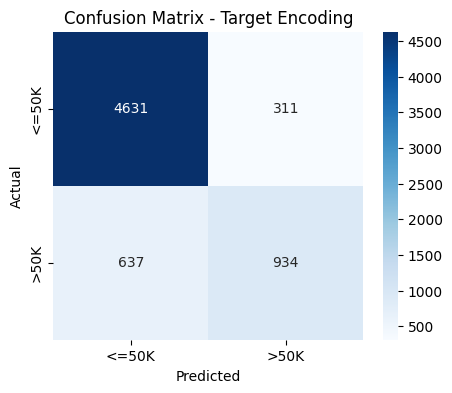

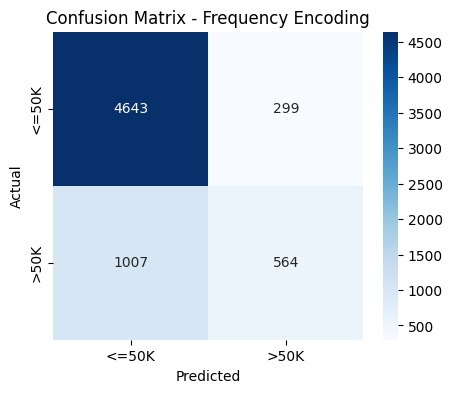

Classification Report - Target Encoding:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      4942
         1.0       0.75      0.59      0.66      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

Classification Report - Frequency Encoding:
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      4942
         1.0       0.65      0.36      0.46      1571

    accuracy                           0.80      6513
   macro avg       0.74      0.65      0.67      6513
weighted avg       0.78      0.80      0.78      6513



In [82]:
from sklearn.metrics import confusion_matrix, classification_report#(Uses code from Chat-GPT 4o)
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrices
cm_target = confusion_matrix(y_test, y_pred_target)
cm_freq = confusion_matrix(y_test, y_pred_freq)

# Function to plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_target, "Confusion Matrix - Target Encoding")
plot_confusion_matrix(cm_freq, "Confusion Matrix - Frequency Encoding")

# Print detailed classification reports
print("Classification Report - Target Encoding:")
print(classification_report(y_test, y_pred_target))

print("Classification Report - Frequency Encoding:")
print(classification_report(y_test, y_pred_freq))

